In [1]:
### Step 1

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
from sklearn.ensemble import ExtraTreesClassifier
import operator
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
np.random.seed(0)

In [3]:
# Warning Libraries :
import warnings
warnings.filterwarnings("ignore")

# Scientific and Data Manipulation Libraries :
import pandas as pd
from pandas.api.types import is_object_dtype, is_categorical
import numpy as np
import math
import gc
import os

# Data Viz & Regular Expression Libraries :
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Scikit-Learn ML Libraries :
from sklearn.externals                import joblib
from sklearn.preprocessing            import LabelEncoder, OneHotEncoder 
from sklearn.preprocessing            import StandardScaler, MinMaxScaler, Normalizer, RobustScaler, MaxAbsScaler
from sklearn.model_selection          import GridSearchCV, KFold, StratifiedKFold, train_test_split, cross_val_score
from sklearn.linear_model             import SGDClassifier, LogisticRegression, LinearRegression
from sklearn.linear_model             import MultiTaskElasticNet, ElasticNet, Lasso, RidgeClassifier, PassiveAggressiveClassifier
from sklearn.neighbors                import KNeighborsClassifier
from sklearn.svm                      import SVC, LinearSVC, NuSVC
from sklearn.gaussian_process         import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree                     import DecisionTreeClassifier
from sklearn.experimental             import enable_hist_gradient_boosting
from sklearn.ensemble                 import ExtraTreesClassifier, VotingClassifier, RandomForestClassifier
from sklearn.ensemble                 import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes              import MultinomialNB, GaussianNB, BernoulliNB, CategoricalNB, ComplementNB
from sklearn.discriminant_analysis    import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics                  import f1_score, accuracy_score, precision_score , recall_score, roc_auc_score, log_loss
from sklearn.metrics                  import confusion_matrix, classification_report
from sklearn.decomposition            import IncrementalPCA
from sklearn.pipeline                 import Pipeline
from sklearn.impute                   import SimpleImputer
from sklearn.compose                  import ColumnTransformer

# ML Statsmodels Libraries :
from statsmodels.stats.proportion     import proportion_confint

# Boosting Algorithms :
from xgboost                          import XGBClassifier
from catboost                         import CatBoostClassifier
from lightgbm                         import LGBMClassifier

In [4]:
def datetounix(df):
    # Initialising unixtime list
    unixtime = []
    
    # Running a loop for converting Date to seconds
    for date in df['DateTime']:
        unixtime.append(time.mktime(date.timetuple()))
    
    # Replacing Date with unixtime list
    df['DateTime'] = unixtime
    return(df)

In [5]:
# Step 2 : Data Cleaning

In [6]:
# Set Location path :
import os
os.chdir("C:/Users/LD196YS/Desktop/0.                          Winning_Kaggle/1. AV - HR Analytics Hackathon/0.      IOT ML Hackathon/")

In [7]:
pwd

'C:\\Users\\LD196YS\\Desktop\\0.                          Winning_Kaggle\\1. AV - HR Analytics Hackathon\\0.      IOT ML Hackathon'

In [8]:
train = pd.read_csv(r'1.Data/train_aWnotuB.csv', encoding='ISO-8859-1', engine='c')
train.drop(["ID"],axis = 1,inplace=True)

test  = pd.read_csv(r'1.Data/test_BdBKkAj_L87Nc3S.csv' , encoding='ISO-8859-1', engine='c')
test_ID = test["ID"]
test.drop(["ID"],axis = 1,inplace=True)

In [9]:
def display_head_tail(data, head_rows, tail_rows):
    
    print("### Data Head : ###")
    display(data.head(head_rows))
    print("")
    print("### Data Tail : ###")
    display(data.tail(tail_rows))
    
    return True

In [10]:
def display_data_information(data, data_types):
    print("### Data Information : ###\n")
    data.info()
    print("")
    for VARIABLE in data_types :
        data_type = data.select_dtypes(include=[ VARIABLE ]).dtypes
        if len(data_type) > 0 :
            print("### Data - "+str(len(data_type))+" "+VARIABLE+" Columns : ###")
            display(data_type)
    return True

In [11]:
def display_data_description(data, numeric_data_types, categorical_data_types):
    print("")
    print("### Data Description : ###")
    display(data.describe( include = numeric_data_types))
    display(data.describe( include = categorical_data_types))
    return True

In [12]:
def display_unique(data):
    for column in data.columns :
        
        print("No of Unique Values in "+column+" Column are : "+str(data[column].nunique()))
        print("Actual Unique Values in "+column+" Column are : "+str(data[column].sort_values(ascending=True,na_position='last').unique() ))
        print("NULL Values :")
        print(data[ column ].isnull().sum())
        print("Value Counts :")
        print(data[column].value_counts())
        print("")

In [13]:
def remove_duplicate(data):
    
    print("BEFORE REMOVING DUPLICATES : ",data.shape)
    data.drop_duplicates(keep=False, inplace=True) 
    print("AFTER REMOVING DUPLICATES : ",data.shape)
    
    return data

In [14]:
data_types             = ["float32","float64","int32","int64","object","category"]

# train["Surge_Pricing_Type"] = train["Surge_Pricing_Type"].astype('object')

# Display Data Information :
display_data_information(train, data_types)

# Display Data Head and Tail :
display_head_tail(train, head_rows=5, tail_rows=2)

# Display Data Description :
display_data_description(train, data_types[0:4], data_types[4:6])

# display_count_graph(train)

train = remove_duplicate(train)

# display_count_graph(train)

### Data Information : ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
DateTime    48120 non-null object
Junction    48120 non-null int64
Vehicles    48120 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ MB

### Data - 2 int64 Columns : ###


Junction    int64
Vehicles    int64
dtype: object

### Data - 1 object Columns : ###


DateTime    object
dtype: object

### Data Head : ###


,DateTime,Junction,Vehicles
0,2015-11-01 00:00:00,1,15
1,2015-11-01 01:00:00,1,13
2,2015-11-01 02:00:00,1,10
3,2015-11-01 03:00:00,1,7
4,2015-11-01 04:00:00,1,9



### Data Tail : ###


,DateTime,Junction,Vehicles
48118,2017-06-30 22:00:00,4,22
48119,2017-06-30 23:00:00,4,12



### Data Description : ###


,Junction,Vehicles
count,48120.000000,48120.000000
mean,2.180549,22.791334
std,0.966955,20.750063
min,1.000000,1.000000
25%,1.000000,9.000000
50%,2.000000,15.000000
75%,3.000000,29.000000
max,4.000000,180.000000


,DateTime
count,48120
unique,14592
top,2017-06-22 13:00:00
freq,4


BEFORE REMOVING DUPLICATES :  (48120, 3)
AFTER REMOVING DUPLICATES :  (48120, 3)


In [15]:
# Display Unique Values in Columns :
display_unique(train)

No of Unique Values in DateTime Column are : 14592
Actual Unique Values in DateTime Column are : ['2015-11-01 00:00:00' '2015-11-01 01:00:00' '2015-11-01 02:00:00' ...
 '2017-06-30 21:00:00' '2017-06-30 22:00:00' '2017-06-30 23:00:00']
NULL Values :
0
Value Counts :
2017-06-22 13:00:00    4
2017-06-27 23:00:00    4
2017-03-20 00:00:00    4
2017-02-12 05:00:00    4
2017-02-13 17:00:00    4
2017-05-29 08:00:00    4
2017-03-12 19:00:00    4
2017-05-18 13:00:00    4
2017-03-12 13:00:00    4
2017-06-20 04:00:00    4
2017-03-28 16:00:00    4
2017-06-25 19:00:00    4
2017-01-15 11:00:00    4
2017-01-30 14:00:00    4
2017-01-24 10:00:00    4
2017-05-17 03:00:00    4
2017-02-04 06:00:00    4
2017-03-27 04:00:00    4
2017-01-31 00:00:00    4
2017-01-23 09:00:00    4
2017-02-23 06:00:00    4
2017-01-11 03:00:00    4
2017-02-23 07:00:00    4
2017-03-08 21:00:00    4
2017-02-20 22:00:00    4
2017-06-05 20:00:00    4
2017-03-10 11:00:00    4
2017-01-21 00:00:00    4
2017-04-04 02:00:00    4
2017-02-

In [16]:
# Converting to datetime
train['DateTime'] = pd.to_datetime(train['DateTime'])
test['DateTime'] = pd.to_datetime(test['DateTime'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 2 columns):
DateTime    11808 non-null datetime64[ns]
Junction    11808 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 184.6 KB


In [17]:
# Creating features from DateTime for train data

train['Weekday'] = [datetime.weekday(date) for date in train.DateTime]
train['Year'] = [date.year for date in train.DateTime]
train['Month'] = [date.month for date in train.DateTime]
train['Day'] = [date.day for date in train.DateTime]
train['Time'] = [((date.hour*60+(date.minute))*60)+date.second for date in train.DateTime]
train['Week'] = [date.week for date in train.DateTime]
train['Quarter'] = [date.quarter for date in train.DateTime]

# Creating features from DateTime for test data

test['Weekday'] = [datetime.weekday(date) for date in test.DateTime]
test['Year'] = [date.year for date in test.DateTime]
test['Month'] = [date.month for date in test.DateTime]
test['Day'] = [date.day for date in test.DateTime]
test['Time'] = [((date.hour*60+(date.minute))*60)+date.second for date in test.DateTime]
test['Week'] = [date.week for date in test.DateTime]
test['Quarter'] = [date.quarter for date in test.DateTime]

In [18]:
# # create an instance for tree feature selection
# tree_clf = RandomForestClassifier()

# # first create arrays holding input and output data
# # get the features into an array X
# # remove target column from the df
# train_features = train.drop(['Vehicles'], axis=1)

# # Convet timestamp to seconds
# train_features = datetounix(train_features)

# # store features in X array
# X = train_features.values

# # Store target feature in y array
# y = train['Vehicles'].values

# # fit the model
# tree_clf.fit(X, y)

# # Preparing variables
# importances = tree_clf.feature_importances_
# feature_names = train_features.columns.tolist()

# feature_imp_dict = dict(zip(feature_names, importances))
# sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)

# indices = np.argsort(importances)[::-1]

# # Print the feature ranking
# print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("feature %d : %s (%f)" % (indices[f], sorted_features[f][0], sorted_features[f][1]))

# # Plot the feature importances of the forest
# plt.figure(0)
# plt.title("Feature importances")
# plt.bar(range(X.shape[1]), importances[indices],
#        color="r", align="center")
# plt.xticks(range(X.shape[1]), indices)
# plt.xlim([-1, X.shape[1]])
# plt.show()

In [19]:
# print("Junction")
# print("X_test :",X_test["Junction"].unique())
# print("X :",X["Junction"].unique())

# print("Weekday")
# print("X_test :",X_test["Weekday"].unique())
# print("X :",X["Weekday"].unique())

# print("Day")
# print("X_test :",X_test["Day"].unique())
# print("X :",X["Day"].unique())

In [20]:
######################################## X_test creation for Prediction #################################

# Convert timestamp to seconds
test_features = datetounix(test.drop(['Year', 'Quarter', 'Month'], axis=1))

# Create X_test from the test set
""
X_test = test_features
X_test[ 'Junction' ]                    = X_test[ 'Junction' ].astype('str')
X_test[ 'Weekday' ]                     = X_test[ 'Weekday' ].astype('str')
X_test[ 'Day' ]                         = X_test[ 'Day' ].astype('str')
X_test = pd.get_dummies(X_test)
######################################## Dropping Features from train set #######################

train_features = train.drop(['Vehicles','Year', 'Quarter', 'Month'], axis=1)

# Convert timestamp to seconds
train_features = datetounix(train_features)

# store features in X array
X = train_features  
X[ 'Junction' ]                    = X[ 'Junction' ].astype('str')
X[ 'Weekday' ]                     = X[ 'Weekday' ].astype('str')
X[ 'Day' ]                         = X[ 'Day' ].astype('str')
X = pd.get_dummies(X)
# store target in y array
y = train['Vehicles'].to_frame()

In [21]:
X.head(2)

,DateTime,Time,Week,Junction_1,Junction_2,Junction_3,Junction_4,Weekday_0,Weekday_1,Weekday_2,...,Day_29,Day_3,Day_30,Day_31,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9
0,1.446316e+09,0,44,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.446320e+09,3600,44,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X_test.shape

(11808, 45)

In [23]:
X.shape

(48120, 45)

In [24]:
y.shape

(48120, 1)

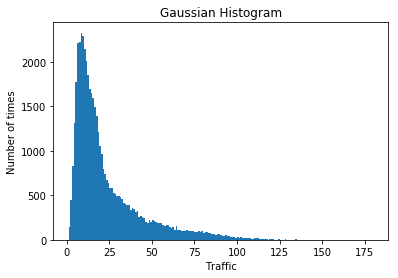

In [25]:
# Visualising the histogram for positive reviews only from train and dataset
data = train.Vehicles
binwidth = 1
plt.hist(data, bins=range(min(data), max(data) + binwidth, binwidth), log=False)
plt.title("Gaussian Histogram")
plt.xlabel("Traffic")
plt.ylabel("Number of times")
plt.show()

In [26]:
counter = 90

In [27]:
# Data prep
df_solution = pd.DataFrame()
df_solution['ID'] = test_ID

# Starting time for time calculations
start_time = time.time()

value = 16
# Create decision tree object
clf = DecisionTreeClassifier(criterion='gini',  max_depth = 100,
                            random_state = value
                            )

# fit the model
clf = clf.fit(X, y)

# predict the outcome for testing data
predictions = clf.predict(X_test)

print("The time taken to execute is %s seconds" % (time.time() - start_time))

# Prepare Solution dataframe
df_solution['Vehicles'] = predictions
display(df_solution.head())

submission_location = r"C:/Users/LD196YS/Desktop/0.                          Winning_Kaggle/1. AV - HR Analytics Hackathon/0.      IOT ML Hackathon/2. Final Data/2.Output/"
classifier_name = "Decision_Tree_DT_Gini_Max_depth=100_Random_state="+str(value)

counter = counter + 1
df_solution.to_csv(submission_location+"S"+str(counter)+" "+classifier_name+".csv", index = False)

The time taken to execute is 0.834998369216919 seconds


,ID,Vehicles
0,20170701001,68
1,20170701011,54
2,20170701021,41
3,20170701031,42
4,20170701041,36


In [28]:
STOPP !!!

SyntaxError: invalid syntax (<ipython-input-28-129109b598f5>, line 1)

In [ ]:
# def generate_feature_target(data,drop_variables):
    
#     X_data = data.drop( drop_variables, axis = 1 )
#     y_data = data[ drop_variables[0] ].to_frame()
    
#     return X_data, y_data

# # NOTE : Always mention Target Variable as 1st Drop Variable:
# drop_variables = ["Vehicles"]
# X_train, y_train = generate_feature_target(train ,drop_variables)
# X_test = test

# counter                 = 1
# fold                    = KFold( n_splits=5, random_state = 0 )
# y_pred_list             = []
# print("X_train.shape",X_train.shape," | y_train.shape",y_train.shape)

# def ens(X_train, y_train) :
#     counter = 60
#     for train_index, test_index in fold.split(X_train,y_train) :
#         y_train = y_train.astype('str')
#         x_train_new, x_val = X_train.iloc[train_index], X_train.iloc[test_index]
#         y_train_new, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
            
#         clf = DecisionTreeClassifier(criterion='gini', max_depth = 10, random_state = 16)    
#         clf.fit( x_train_new,y_train_new )            
#         y_val_pred = clf.predict(x_val)
#         y_pred_list.append(y_val_pred)
#         counter = counter + 1

#     np.mean(y_pred_list)
#     return True

# value = ens(X_train, y_train)

# # value = Data prep
# df_solution = pd.DataFrame()
# df_solution['ID'] = test_ID

# # Prepare Solution dataframe
# df_solution['Vehicles'] = y_pred_list
# display(df_solution.head())

# submission_location = r"C:/Users/LD196YS/Desktop/0.                          Winning_Kaggle/1. AV - HR Analytics Hackathon/0.      IOT ML Hackathon/2. Final Data/2.Output/"
# classifier_name = "'XGBClassifier_Random_state="+str(value)

# counter = counter + 1
# df_solution.to_csv(submission_location+"S"+str(counter)+" "+classifier_name+".csv", index = False)

In [ ]:
Tree_Classifiers = {
                     '0.Decision_Tree' : DecisionTreeClassifier(),
                     '1.Random_Forest' : RandomForestClassifier(n_estimators=100, random_state=16), 
                     '2.Extra_Trees'   : ExtraTreesClassifier(),  
                     '3.Bagging'       : BaggingClassifier(base_estimator = DecisionTreeClassifier(),  n_estimators = 500, random_state = 0)
                   }

print( list(Tree_Classifiers.keys()) )
# print( list(Tree_Classifiers.values()) )

In [ ]:
# # Data prep
# df_solution = pd.DataFrame()
# df_solution['ID'] = test_ID

# # Starting time for time calculations
# start_time = time.time()

# value = 0
# # Create decision tree object
# clf = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5,subsample = 0.70, 
#                                                               objective='multiclass', scale_pos_weight = 2.5,updater ="grow_histmaker",base_score  = 0.2,
#                                                                )

# # fit the model
# clf.fit(X, y)

# # predict the outcome for testing data
# predictions = clf.predict(X_test)

# print("The time taken to execute is %s seconds" % (time.time() - start_time))

# # Prepare Solution dataframe
# df_solution['Vehicles'] = predictions
# display(df_solution.head())

# submission_location = r"C:/Users/LD196YS/Desktop/0.                          Winning_Kaggle/1. AV - HR Analytics Hackathon/0.      IOT ML Hackathon/2. Final Data/2.Output/"
# classifier_name = "'XGBClassifier_Random_state="+str(value)

# counter = counter + 1
# df_solution.to_csv(submission_location+"S"+str(counter)+" "+classifier_name+".csv", index = False)